<a href="https://colab.research.google.com/github/Faouzi-Slimi/TRAITEMENTS-DES-IMAGES/blob/main/TP4_Restauration_par_Filtrage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tp 4 : Restauration par Filtrage

## Introduction

Le but de ce TP consiste à analyser des images dégradées par différents types de bruits et
à mettre au point des méthodes de restauration par différentes techniques de filtrage.
L’étudiant aura la possibilité de comparer entre les filtres dans le domaine spatial et
fréquentiel.


##Génération des bruits 

#*Techniques de restauration par filtrage*

✈ Filtrage dans le domaine spatial

a) Filtrage linéaire d’une image en niveaux de gris


In [ ]:
# Import Packages

import numpy as np
import matplotlib.pyplot as plt
import cv2 # as cv
! pip install imhist
from imhist import imhist

from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


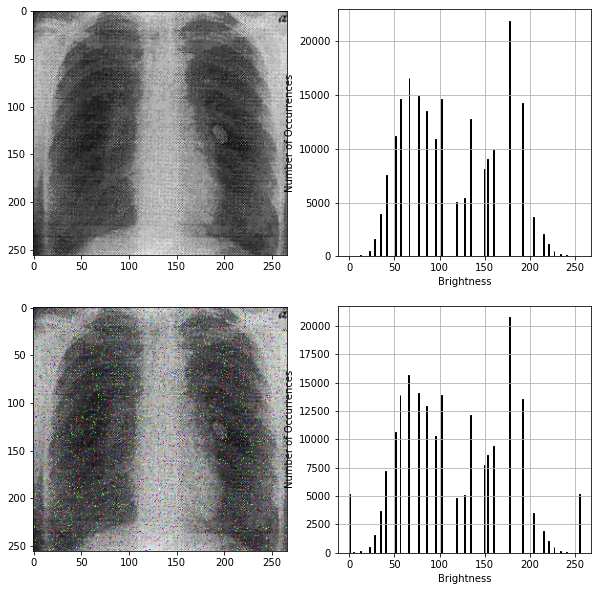

In [ ]:
# Lire l’image scan.bmp ou hoffman.bmp.
img0 = cv2.imread("/content/drive/MyDrive/images2021/scan.bmp")

# Ajouter un bruit ‘sel et poivre’ à l’image. Afficher, sur la même figure, l’image
# originale, l’image bruitée et les histogrammes des deux images.

img = random_noise(img0,mode="s&p")
img = np.uint8(255*img)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img0,cmap='gray')
plt.subplot(223)
plt.imshow(img,cmap='gray')

plt.subplot(222)
plt.hist(img0.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid()

plt.subplot(224)
plt.hist(img.ravel(), bins=256, range=(0.0, 255), fc='b', ec='k')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid()

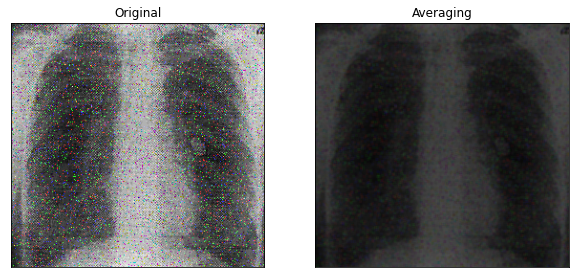

In [ ]:
# Déclarer h un noyau qui correspond à un filtre moyenneur de taille 3*3.

kernel = np.ones((3,3))/25
# Calculer le produit de convolution de l’image par ce filtre en utilisant la fonction
#python « cv2.filter2D ».
#  Filtrer l’image avec un filtre moyenneur de taille 3*3, 5*5, puis 7*7, en utilisant
# la fonction de Python « cv2.blur ».
#  Comparer visuellement les résultats obtenus.


blur = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

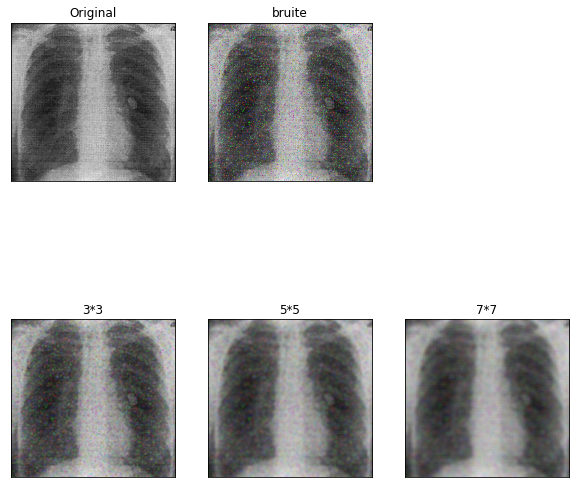

22.36398172592955
22.5308812875029
22.572260169614392


In [ ]:

#  Calculer le PSNR de chaque image.
#  Quelle est la meilleure image au sens de PSNR.

blur1 = cv2.blur(img,(3,3))
blur2 = cv2.blur(img,(5,5))
blur3 = cv2.blur(img,(7,7))

plt.figure(figsize=(10,10))
plt.subplot(231),plt.imshow(img0),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img),plt.title('bruite')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(blur1),plt.title('3*3')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(blur2),plt.title('5*5')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(blur3),plt.title('7*7')
plt.xticks([]), plt.yticks([])
plt.show()

psnr1 = peak_signal_noise_ratio(img0,blur1)

psnr2 = peak_signal_noise_ratio(img0,blur2)

psnr3 = peak_signal_noise_ratio(img0,blur3)
print(psnr1)
print(psnr2)
print(psnr3)

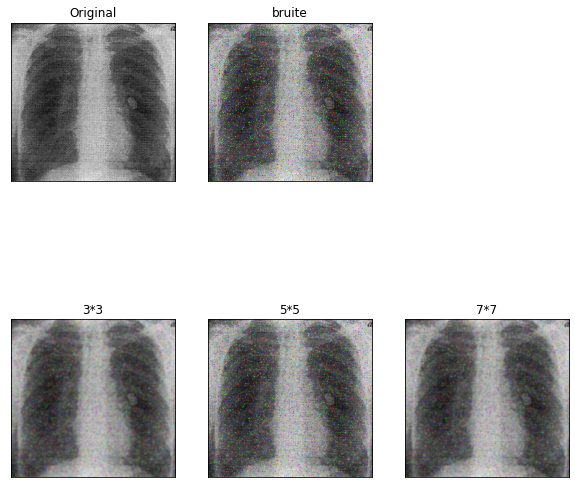

22.809364548199348
21.299203650589227
22.79117868434539


In [ ]:

#  Refaire le même travail avec le filtre gaussien de taille 5*5. Varier à chaque fois
# la variance (sigma)

img = random_noise(img0,mode="s&p")
img = np.uint8(255*img)

blur1 = cv2.GaussianBlur(img,(5,5),0)
blur2 = cv2.GaussianBlur(img,(5,5),0.5)
blur3 = cv2.GaussianBlur(img,(5,5),0.9)
plt.figure(figsize=(10,10))
plt.subplot(231),plt.imshow(img0),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img),plt.title('bruite')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(blur1),plt.title('3*3')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(blur2),plt.title('5*5')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(blur3),plt.title('7*7')
plt.xticks([]), plt.yticks([])
plt.show()

psnr1 = peak_signal_noise_ratio(img0,blur1)

psnr2 = peak_signal_noise_ratio(img0,blur2)

psnr3 = peak_signal_noise_ratio(img0,blur3)
print(psnr1)
print(psnr2)
print(psnr3)


b) Filtrage non linéaire

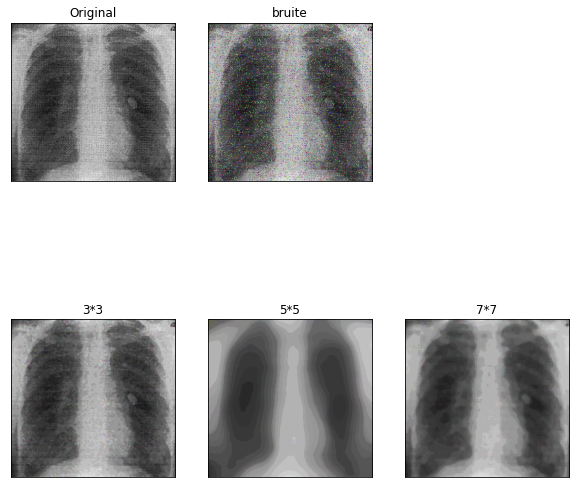

23.39945195303327
21.465459599307035
22.74608257387402


In [ ]:
#  Lire et afficher l’image médicale de synthèse scan.bmp ou hoffman.bmp :
img0 = cv2.imread("/content/drive/MyDrive/images2021/scan.bmp")


# Ajouter un bruit ‘sel et poivre’ à l’image. Afficher, sur la même figure, l’image originale et l’image bruitée. Insérer des titres.
# Afficher les histogrammes des deux images. Les interpréter.
# Filtrer l’image bruitée avec le filtre non linéaire : médian
# Commenter les résultats obtenus.

img = random_noise(img0,mode="s&p")
img = np.uint8(255*img)

blur1 = cv2.medianBlur(img,3)
blur2 = cv2.medianBlur(img,35)
blur3 = cv2.medianBlur(img,7)

plt.figure(figsize=(10,10))
plt.subplot(231),plt.imshow(img0),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img),plt.title('bruite')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(blur1),plt.title('3*3')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(blur2),plt.title('5*5')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(blur3),plt.title('7*7')
plt.xticks([]), plt.yticks([])
plt.show()

psnr1 = peak_signal_noise_ratio(img0,blur1)
psnr2 = peak_signal_noise_ratio(img0,blur2)
psnr3 = peak_signal_noise_ratio(img0,blur3)

print(psnr1)
print(psnr2)
print(psnr3)


c) Filtrage linéaire et Non Linéaire d’une image couleur

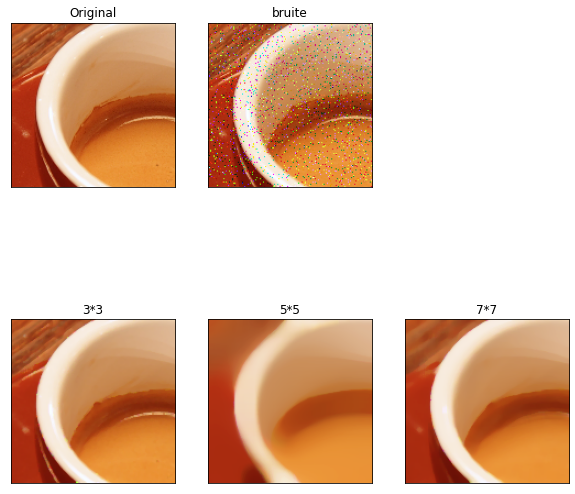

34.907124969645
22.769936888232067
29.146397654438534


In [ ]:
# Lire l’image de « melan.jpg 

img0 = img_as_float(data.coffee())[30:180, 150:300]
img0=np.uint8(255*img0)

# Ajouter un bruit ‘sel et poivre’ à l’image. Afficher, sur la même figure, l’image originale et l’image bruitée.

img = random_noise(img0,mode="s&p")
img = np.uint8(255*img)

# Filtrer l’image bruitée avec les filtres : moyenneur, gaussian et médian de taille 5*5.
# Calculer le PSNR de chaque image.

blur1 = cv2.medianBlur(img,3)
blur2 = cv2.medianBlur(img,35)
blur3 = cv2.medianBlur(img,7)

plt.figure(figsize=(10,10))
plt.subplot(231),plt.imshow(img0),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(img),plt.title('bruite')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(blur1),plt.title('3*3')
plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(blur2),plt.title('5*5')
plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(blur3),plt.title('7*7')
plt.xticks([]), plt.yticks([])
plt.show()

psnr1 = peak_signal_noise_ratio(img0,blur1)
psnr2 = peak_signal_noise_ratio(img0,blur2)
psnr3 = peak_signal_noise_ratio(img0,blur3)

print(psnr1)
print(psnr2)
print(psnr3)